# Top 3 S&P 500 Analysis

This is a stock analysis project that utilize the top 3 constitutes of the S&P 500, which are Apple (AAPL), NVIDIA (NVDA), and Microsoft (MSFT). All three came from the same sector, Information Technology, thus creating a robust comparison. This notebook utilize the help of several popular financial libraries in python, such as yfinance, quanstats, pyportfolioopt, and ta. This notebook consists of 
1. General Analysis ✅
2. Technical Analysis
3. Fundamental Analysis ✅
4. Price Prediction

The output of this notebook is to showcase the comparison between the three stocks and give recommendation on which stocks to buy amongst the three. 

## Libraries

There are multiple libraries that supports financial analysis. In this notebook, we will use the four essential libraries:
* yfinance: Python Library to extract market data
* quantstats: quantitative financial analysis, provides various tools to conduct analysis
* pyportfolioopt: useful library for portfolio optimization and asset allocation
* TA (technical analysis): Python library to conduct technical analysis

This notebook follows along this Kaggle notebook: https://www.kaggle.com/code/lusfernandotorres/data-science-for-financial-markets#introduction with a twist of my own analysis and choice of stocks.

In [3]:
#Importing Libraries

#Basic and essential python libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Financial Libraries 
import quantstats as qs
import ta
import yfinance as yf

#Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
qs.extend_pandas()

## Prepare Data

For this project, we will take top 3 of S&P 500 constitutes, which are Apple (AAPL), NVIDIA (NVDA), and Microsoft (MSFT). All three companies are Information Technology companies, thus we could do a comparison.

In [5]:
#Apple

aapl_ticker = yf.Ticker("AAPL")
aapl = aapl_ticker.history(start="2019-01-01", end="2024-12-31", interval="1d")
aapl['daily_returns'] = aapl['Close'].pct_change()

In [6]:
#NVIDIA 

nvda_ticker = yf.Ticker("NVDA")
nvda = nvda_ticker.history(start="2019-01-01", end="2024-12-31", interval="1d")
nvda['daily_returns'] = nvda['Close'].pct_change()

In [7]:
#Microsoft

msft_ticker = yf.Ticker("MSFT")
msft = msft_ticker.history(start="2019-01-01", end="2024-12-31", interval="1d")
msft['daily_returns'] = msft['Close'].pct_change()

In [10]:
aapl.index = aapl.index.tz_convert(None)
nvda.index = nvda.index.tz_convert(None)
msft.index = msft.index.tz_convert(None)

In [11]:
tickers = [aapl_ticker, nvda_ticker, msft_ticker]

We will also get the sector's daily returns as a benchmark. As we get from the info, the three stocks' sector is technology, which has a code of "XLK".

In [33]:
tech_t = yf.Ticker("XLK")
tech = tech_t.history(start="2019-01-01", end="2024-12-31", interval="1d")
tech['daily_returns'] = tech['Close'].pct_change()

## Companies Profiles
It is important to know the company's profile and line of work before we invest in them. Here I provided some basic information of the companies.

In [151]:
company_profiles = pd.DataFrame(columns=['symbol', 'name', 'industry', 'sector', 'CEO', 'state', 'country'])
company_profiles

,symbol,name,industry,sector,CEO,state,country


In [41]:
keys = ['symbol', 'shortName', 'industry', 'sector', 'companyOfficers', 'state', 'country']

In [153]:
for ticker in tickers:
    globals()[f"{ticker}_values"] = pd.Series(map(ticker.info.get, keys), index=['symbol', 'name', 'industry', 'sector', 'CEO', 'state', 'country'])
    globals()[f"{ticker}_ceo"] = globals()[f"{ticker}_values"][4]['title' == 'CEO']['name']
    globals()[f"{ticker}_values"][4] = globals()[f"{ticker}_ceo"]
    company_profiles = company_profiles._append(globals()[f"{ticker}_values"], ignore_index=True)

company_profiles

,symbol,name,industry,sector,CEO,state,country
0,AAPL,Apple Inc.,Consumer Electronics,Technology,Mr. Timothy D. Cook,CA,United States
1,NVDA,NVIDIA Corporation,Semiconductors,Technology,Mr. Jen-Hsun Huang,CA,United States
2,MSFT,Microsoft Corporation,Software - Infrastructure,Technology,Mr. Satya Nadella,WA,United States


In [166]:
#These are the dictionary of the stock's info that we can get
#aapl_ticker.info

## General Analysis
In this section, we will compare the returns and performance of the three stocks through graphs.

### Daily Returns

Daily returns are a stock's price changes in percentage over a single day. This metrics is important because it shows whether the stock is profitable or not on a daily trade. It will show whether the price increases or decreases in each day.

In [168]:
stocks = [aapl, nvda, msft]
def get_var_name(obj):
    # Retrieve the variable name for a given object from the global scope
    return [name for name, val in globals().items() if val is obj][0]

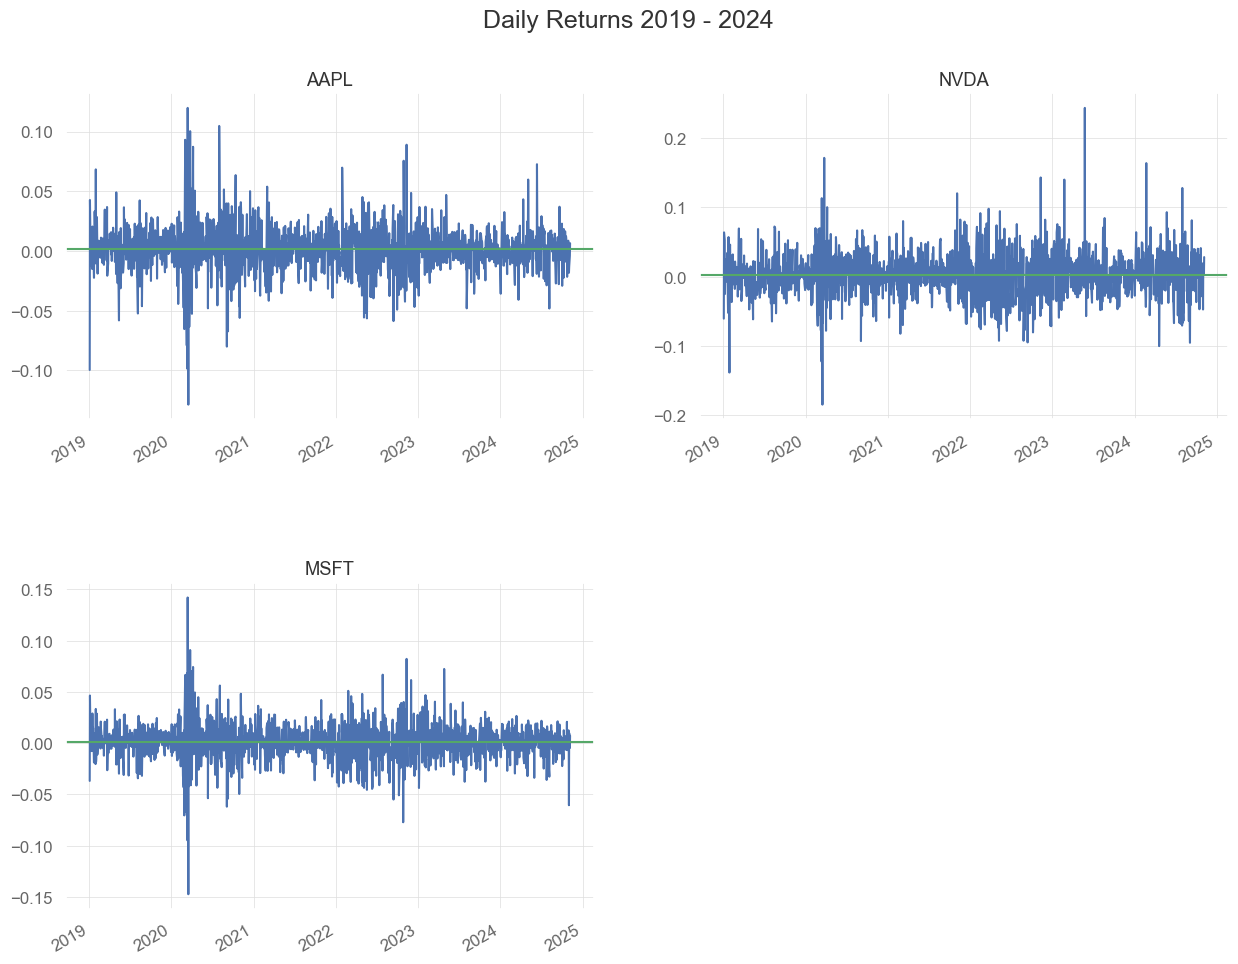

In [176]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Daily Returns 2019 - 2024", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, stock in enumerate(stocks):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    stock['daily_returns'].plot(ax=ax)
    ax.set_title(f"{get_var_name(stock)}".upper())
    
    # chart formatting
    ax.axhline(stock['daily_returns'].mean(), color='g')
    ax.set_xlabel("")


The average daily return is steady around 0% percent for all three stocks and all three experienced a major negative return around 2020, probably due to the COVID-19 crisis. Amongst the three stocks, NVDA has the highest return, but also the highest volatility with returns ranging from 2% to -2%, showing a higher risk. On the other hand, AAPL has the lowest return, but is quite steady throughout the years.

### Histogram & Kurtosis

Apple Daily Return Histogram


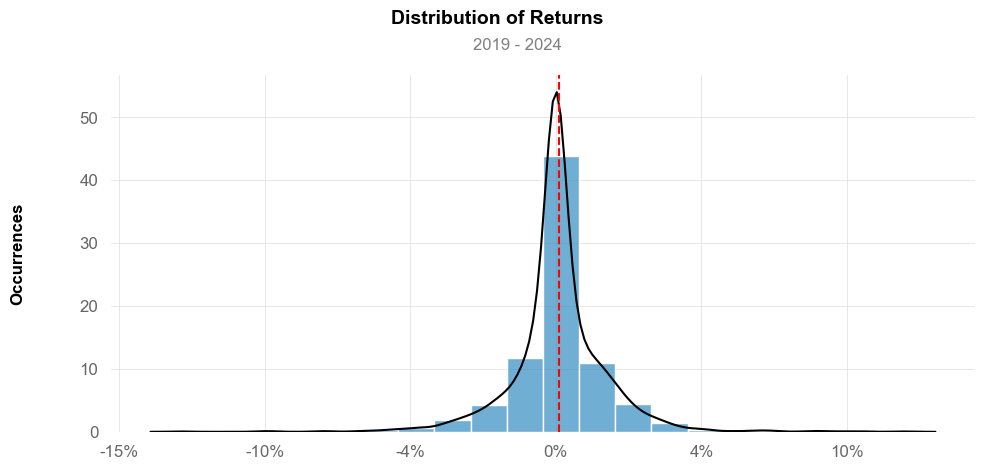

In [87]:
print('Apple Daily Return Histogram')
qs.plots.histogram(aapl['daily_returns'], resample='D')

NVIDIA Daily Return Histogram


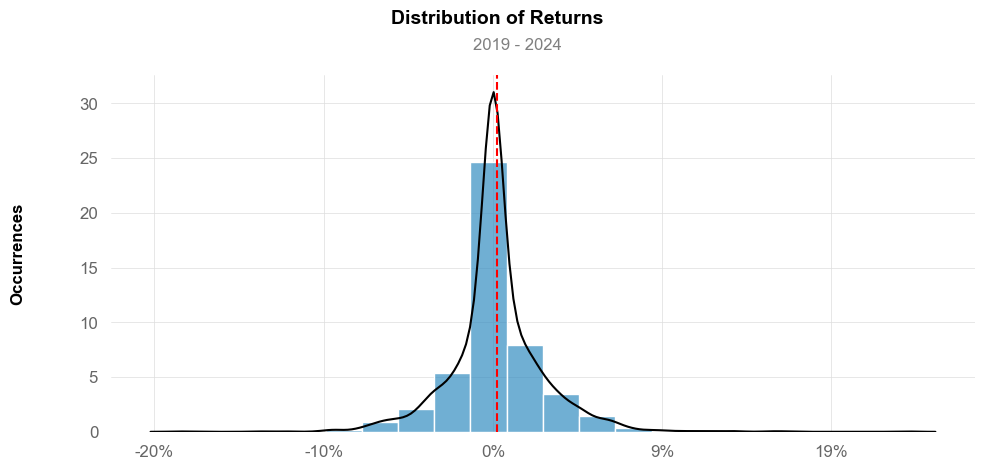

In [21]:
print('NVIDIA Daily Return Histogram')
qs.plots.histogram(nvda['daily_returns'], resample='D')

Microsoft Daily Return Histogram


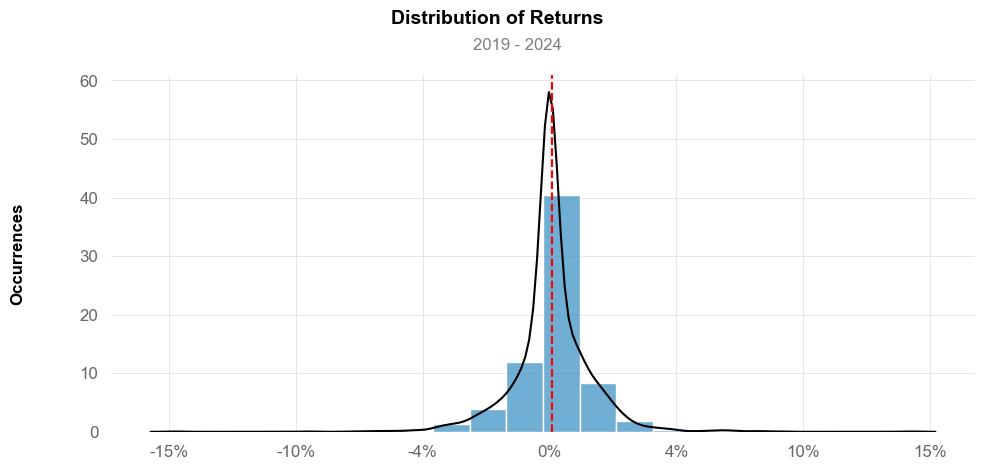

In [81]:
print('Microsoft Daily Return Histogram')
qs.plots.histogram(msft['daily_returns'], resample='D')

From the histograms, we can see:
* Most daily returns are close to zero, the center of distribution, showing a relatively balance between gains and loses.
* Apple and Microsoft have a similar range with most daily return ranging from -4% to 4%, while NVIDIA has a larger range of -10% to 9%. This shows NVIDIA has a high votality in its daily return.
* Apple has a longer left tail, ranging from -15% and 10%, indicating a more negative return. However, it is still not an extreme value. 
* NVIDIA, on the other hand, has a wider range of returns from -20% to 19%, indicating a higher return, but comes with higher risk. 

<b>Kurtosis</b>   
Kurtosis helps investors to identify volatility in a stock, or fluctuations in price that deviate significantly from its average return value. 

In [124]:
print(f"Apple's kurtosis: {qs.stats.kurtosis(aapl['daily_returns']).round(2)}")
print(f"NVIDIA's kurtosis: {qs.stats.kurtosis(nvda['daily_returns']).round(2)}")
print(f"Microsoft's kurtosis: {qs.stats.kurtosis(msft['daily_returns']).round(2)}")

Apple's kurtosis: 5.41
NVIDIA's kurtosis: 4.18
Microsoft's kurtosis: 7.4


The calculation above shows that all stocks has high kurtosis, but one stands out, Microsoft. Microsoft's kurtosis value is above 7, which indicates higher volatility and tail risk, and extreme price movements. A score of 4.18 shows that NVIDIA's daily returns' distributions are not extreme compared to the others, but still high.

### Cumulative Returns
The cumulative return is the return we would get if we were to hold our investments from day 0 (which is Jan 1st, 2019) and those investments get reiinvested.  

In [53]:
aapl_cumre = qs.stats.compsum(aapl['daily_returns'])*100
nvda_cumre = qs.stats.compsum(nvda['daily_returns'])*100
msft_cumre = qs.stats.compsum(msft['daily_returns'])*100

In [77]:
tech_cumre = qs.stats.compsum(tech['daily_returns'])*100

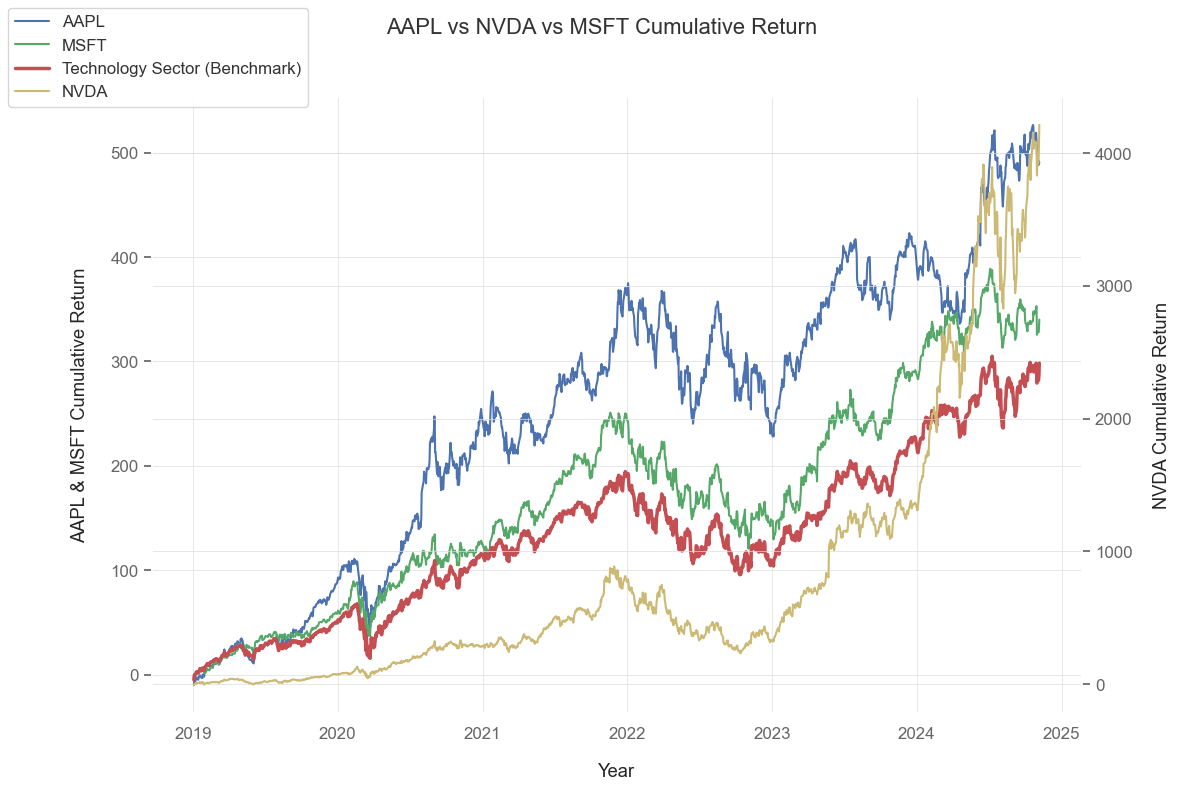

In [79]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(aapl.index, aapl_cumre, color='b', label="AAPL")
ax.plot(msft.index, msft_cumre, color='g', label="MSFT")
ax.plot(tech.index, tech_cumre, color='r', linewidth = 2.5, label="Technology Sector (Benchmark)")
ax.set_ylabel("AAPL & MSFT Cumulative Return", labelpad=15)
ax2 = ax.twinx()
ax2.plot(nvda.index, nvda_cumre, color='y', label="NVDA")
ax2.set_ylabel("NVDA Cumulative Return", labelpad=15)
ax.set_xlabel("Year", labelpad=15)

fig.suptitle("AAPL vs NVDA vs MSFT Cumulative Return")
fig.legend(loc='upper left')
plt.show()

The graph above represent the Cumulative Returns of the three main stocks in S&P 500. I added the sector daily returns as a <b>benchmark</b>.
* These three sectors are all above the benchmark.
* Both MSFT and AAPL show a more stable increase since 2019, with an ending return of around 350% and 500%, respectively.
* NVDA has a whooping return of 4,000%. NVIDIA experience an explosive return, especially in 2024. Usually explosive returns are not as valuable as it might lead to higher risks, while a steady growth is more attractive. However, NVIDIA shows a stable increase with minimal drawdowns / extreme drops.
* Between MSFT and AAPL, we can see that AAPL has a faster and higher increase than MSFT. We can see it from the major increase after mid-2020, where AAPL surpassed MSFT despite having a major drawdown.

### Drawdowns 
Drawdowns shows the drop period of a stock to show the volatility, risk, and recovery behavior of a stock. The deeper the valley, the longer the period of drawdown suggests a higher risk, as it shows the stock takes more time to recover.

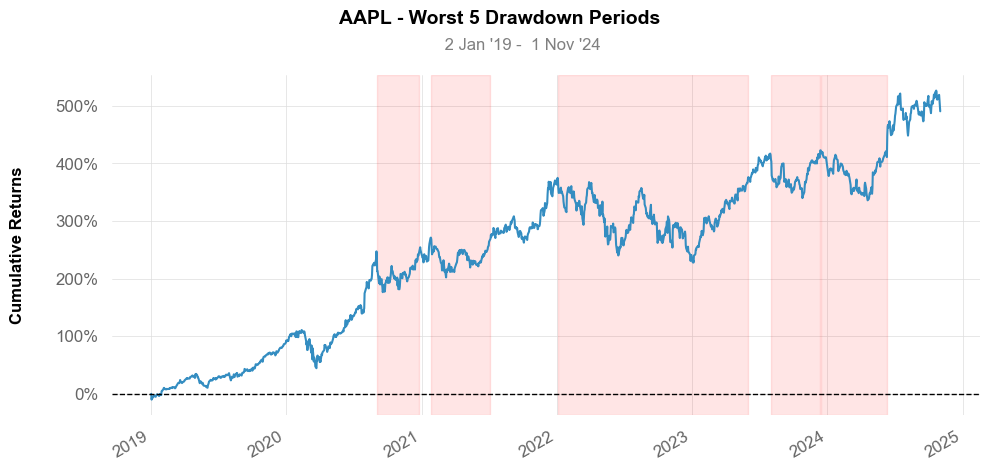

In [150]:
qs.plots.drawdowns_periods(aapl['daily_returns'], title="AAPL", show=True)

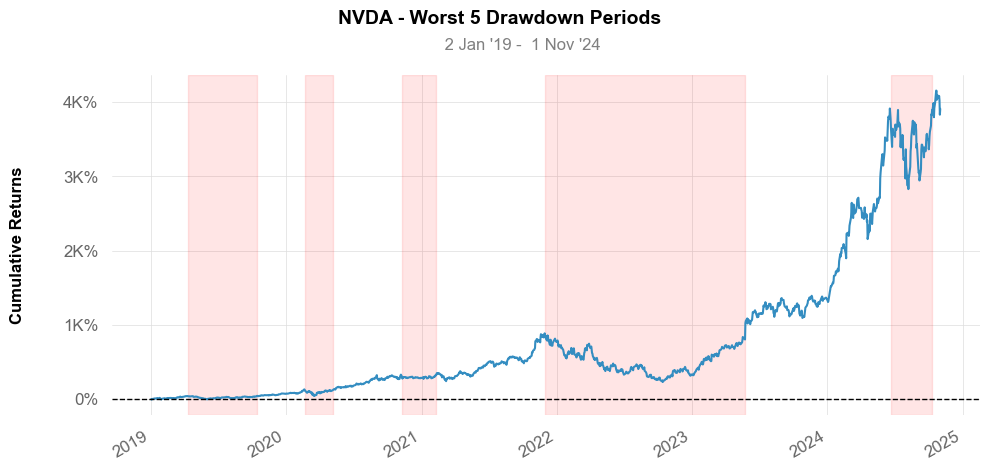

In [156]:
qs.plots.drawdowns_periods(nvda['daily_returns'], title="NVDA", show=True)

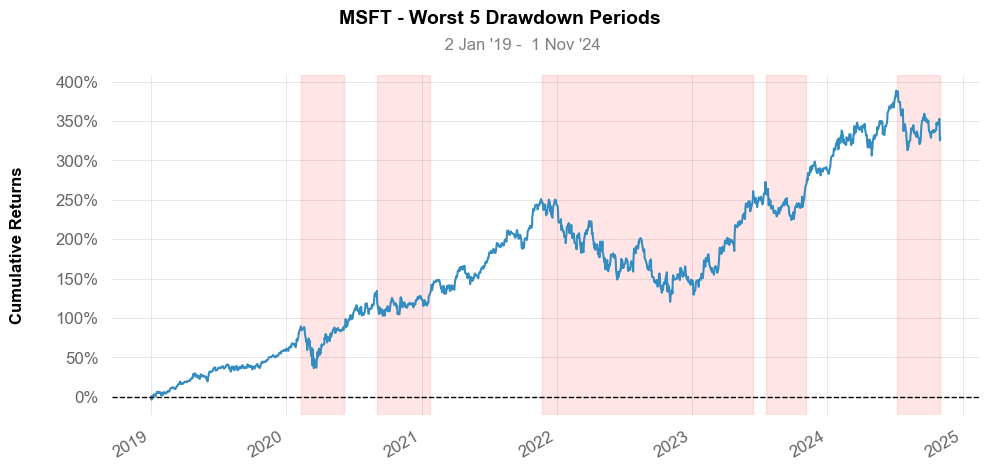

In [382]:
qs.plots.drawdowns_periods(msft['daily_returns'], title="MSFT", show=True)

From the graph above, we can take information that the US Stock Market experienced a great drop for around 2022 until second quarter of 2023. This probably happened due to Market reaction's to Inflation and the war between Russia-and-Ukraine. Overall, S&P 500 fall by 19% throughout the year.  

Focusing on these three stocks, we can see that AAPL has better control on its price amongst the others. NVDA is very volatile, especially in the past year, showing a major drawdown period in 2024. While MSFT has not yet recover and has not touch its highest high price again. We can see in AAPL, its growth is table throughout the years with minor drawdown and is seen to still increasing. 

sc: https://www.washingtonpost.com/business/interactive/2022/stock-market-sp500-down-this-year/

As we can see above, the higher the return, the higher the volatility.

### Performance

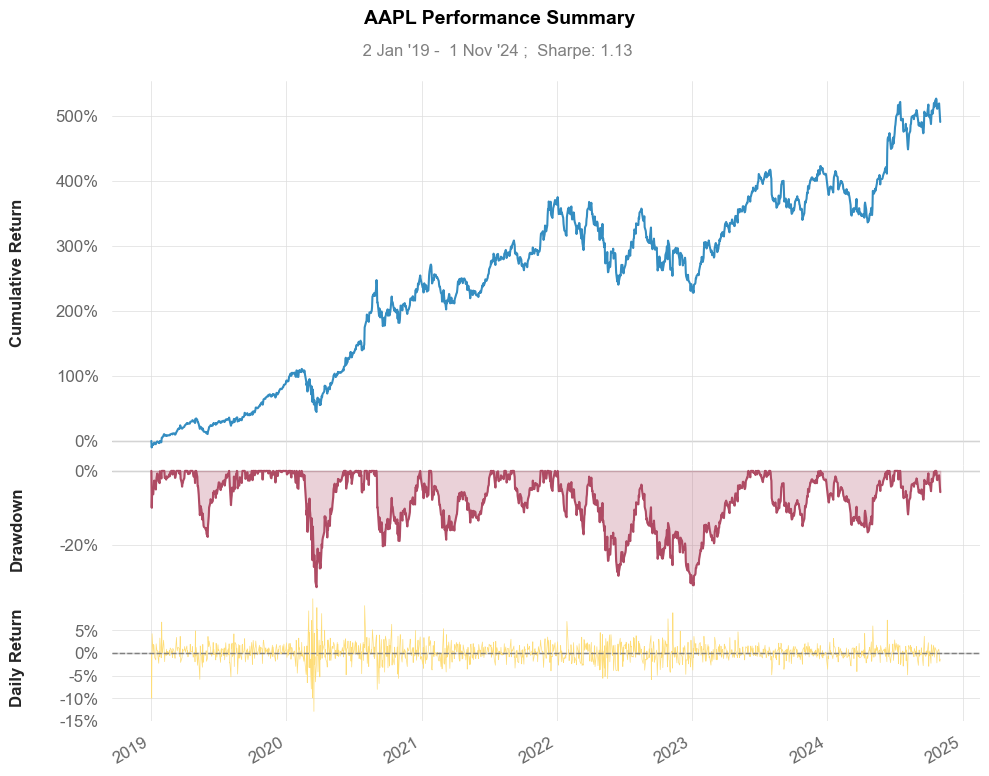

In [404]:
qs.plots.snapshot(aapl['daily_returns'], title="AAPL Performance Summary", show=True)

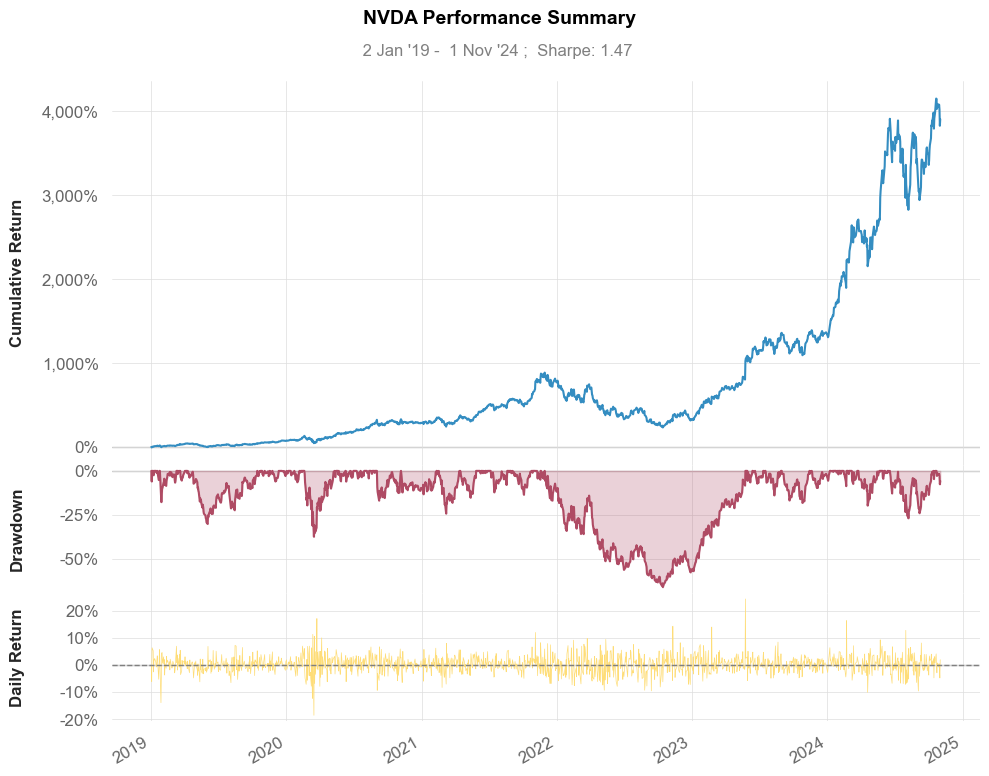

In [402]:
qs.plots.snapshot(nvda['daily_returns'], title="NVDA Performance Summary", show=True)

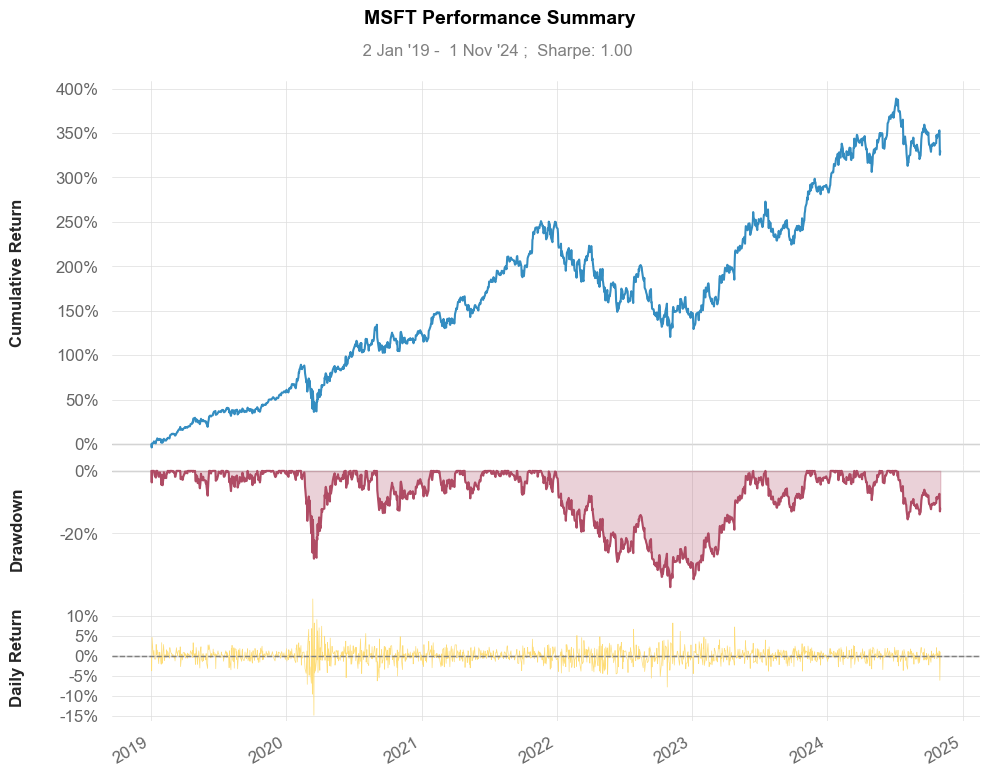

In [406]:
qs.plots.snapshot(msft['daily_returns'], title="MSFT Performance Summary", show=True)

## Fundamental Analysis

Fundamental Analysis is a common method that investors do to value a stock. Fundamental analysis involves valuing the company's performance and economic metrics to analyze the profitability of an investment in one company. Economic metrics are included but not limited to revenues, earning, and market shares.

The Sharpe ratio is a common ratio to analyze the return to risk. The bigger the ratio, the better its' return to risk. From the three stock above, NVDA show the highest ratio. Generally, a sharpe_ratio >= 1 is considered good, sharpe_ratio >= 2 is considered very good, sharpe_ratio >= 3 is excellent, while a sharpe_ratio < 1 is considered bad.

In [437]:
print(f"The Sharpe Ratio for AAPL Daily Returns are: {round(qs.stats.sharpe(aapl['daily_returns']), 2)}")
print(f"The Sharpe Ratio for NVDA Daily Returns are: {round(qs.stats.sharpe(nvda['daily_returns']), 2)}")
print(f"The Sharpe Ratio for MSFT Daily Returns are: {round(qs.stats.sharpe(msft['daily_returns']), 2)}")

The Sharpe Ratio for AAPL Daily Returns are: 1.13
The Sharpe Ratio for NVDA Daily Returns are: 1.47
The Sharpe Ratio for MSFT Daily Returns are: 1.0


All three stock have good sharpe ratio, but NVIDIA has the highest ratio.

In [15]:
print("AAPL Stats")
print(f"Average Return: {round(qs.stats.avg_return(aapl['daily_returns']),4)}")
print(f"Volatility: {round(qs.stats.volatility(aapl['daily_returns']),4)}")
print(f"Expected Return: {round(qs.stats.expected_return(aapl['daily_returns']), 4)}")
print("\n")
print("NVDA Stats")
print(f"Average Return: {round(qs.stats.avg_return(nvda['daily_returns']),4)}")
print(f"Volatility: {round(qs.stats.volatility(nvda['daily_returns']),4)}")
print(f"Expected Return: {round(qs.stats.expected_return(nvda['daily_returns']), 4)}")
print("\n")
print("MSFT Stats")
print(f"Average Return: {round(qs.stats.avg_return(msft['daily_returns']),4)}")
print(f"Volatility: {round(qs.stats.volatility(msft['daily_returns']),4)}")
print(f"Expected Return: {round(qs.stats.expected_return(msft['daily_returns']), 4)}")

AAPL Stats
Average Return: 0.0014
Volatility: 0.3114
Expected Return: 0.0012


NVDA Stats
Average Return: 0.0031
Volatility: 0.5222
Expected Return: 0.0025


MSFT Stats
Average Return: 0.0012
Volatility: 0.292
Expected Return: 0.001


In [92]:
aapl_symbol = aapl_ticker.info['symbol']
aapl_eps = aapl_ticker.info['trailingEps']
aapl_pe_ratio = round(aapl_ticker.info['trailingPE'], 2)
aapl_roe = round(aapl_ticker.info['returnOnEquity']*100, 2)
aapl_roa = round(aapl_ticker.info['returnOnAssets']*100, 2)
aapl_dy = round(aapl_ticker.info['dividendYield']*100, 2)
aapl_ebitda = aapl_ticker.info['ebitda']
aapl_pbv = round(aapl_ticker.info['priceToBook'], 2)
aapl_dte = round(aapl_ticker.info['debtToEquity']*100, 2)

In [94]:
nvda_symbol = nvda_ticker.info['symbol']
nvda_eps = nvda_ticker.info['trailingEps']
nvda_pe_ratio = round(nvda_ticker.info['trailingPE'], 2)
nvda_roe = round(nvda_ticker.info['returnOnEquity']*100, 2)
nvda_roa = round(nvda_ticker.info['returnOnAssets']*100, 2)
nvda_dy = round(nvda_ticker.info['dividendYield']*100, 2)
nvda_ebitda = nvda_ticker.info['ebitda']
nvda_pbv = round(nvda_ticker.info['priceToBook'], 2)
nvdaa_dte = round(nvda_ticker.info['debtToEquity']*100, 2)

In [96]:
msft_symbol = msft_ticker.info['symbol']
msft_eps = msft_ticker.info['trailingEps']
msft_pe_ratio = round(msft_ticker.info['trailingPE'], 2)
msft_roe = round(msft_ticker.info['returnOnEquity']*100, 2)
msft_roa = round(msft_ticker.info['returnOnAssets']*100, 2)
msft_dy = round(msft_ticker.info['dividendYield']*100, 2)
msft_ebitda = msft_ticker.info['ebitda']
msft_pbv = round(msft_ticker.info['priceToBook'], 2)
msft_dte = round(msft_ticker.info['debtToEquity']*100, 2)

In [98]:
print(f"{aapl_symbol}'s Fundamental Indicators:")
print(f"Earnings per Share: {aapl_eps}")
print(f"Price-to-Earnings: {aapl_pe_ratio}")
print(f"ROE: {aapl_roe} %")
print(f"ROA: {aapl_roa} %")
print(f"Dividend Yield: {aapl_dy} %")
print(f"Price to Book Value: {aapl_pbv}")
print(f"EBITDA: ${aapl_ebitda}")
print('\n')
print(f"{nvda_symbol}'s Fundamental Indicators:")
print(f"Earnings per Share: {nvda_eps}")
print(f"Price-to-Earnings: {nvda_pe_ratio}")
print(f"ROE: {nvda_roe} %")
print(f"ROA: {nvda_roa} %")
print(f"Dividend Yield: {nvda_dy} %")
print(f"Price to Book Value: {nvda_pbv}")
print(f"EBITDA: ${nvda_ebitda}")
print('\n')
print(f"{msft_symbol}'s Fundamental Indicators:")
print(f"Earnings per Share: {msft_eps}")
print(f"Price-to-Earnings: {msft_pe_ratio}")
print(f"ROE: {msft_roe} %")
print(f"ROA: {msft_roa} %")
print(f"Dividend Yield: {msft_dy} %")
print(f"Price to Book Value: {msft_pbv}")
print(f"EBITDA: ${msft_ebitda}")

AAPL's Fundamental Indicators:
Earnings per Share: 6.08
Price-to-Earnings: 36.63
ROE: 157.41 %
ROA: 21.46 %
Dividend Yield: 0.45 %
Price to Book Value: 59.12
EBITDA: $134660997120


NVDA's Fundamental Indicators:
Earnings per Share: 2.13
Price-to-Earnings: 68.36
ROE: 123.77 %
ROA: 55.26 %
Dividend Yield: 0.03 %
Price to Book Value: 61.49
EBITDA: $61184000000


MSFT's Fundamental Indicators:
Earnings per Share: 12.1
Price-to-Earnings: 34.73
ROE: 35.6 %
ROA: 14.59 %
Dividend Yield: 0.79 %
Price to Book Value: 10.86
EBITDA: $136551997440
